### Imports

Starting off! Let's import some libraries to ingest the csv file. 

In [124]:

import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

## Ingestion

I converted the datetime column into a datetime object and tried to see how the magnitude of the earthquakes change over time. It seems like the magnitude does not follow something of a downward trend, but the seasonality is hard to see. This is something to keep in mind. 

The date time have been sorted out. This is so that splitting can be done properly.

Next, I decided to look at the distrbution of latitude, longitude and magnitude.

In [125]:
df = pd.read_csv('data.csv',)
df['date_time'] = df.date.str.cat(df.time.copy(), sep =" ")
df['date_time'] = pd.to_datetime(df.date_time)

df['year'] = df.date_time.dt.year
df = df.set_index(df.date_time)
df= df.sort_index()


In [126]:
df.head()

,date,time,latitude,longitude,depth,magnitude,date_time,year
date_time,,,,,,,,
2008-11-01 00:31:25,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99,2008-11-01 00:31:25,2008
2008-11-01 01:34:29,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51,2008-11-01 01:34:29,2008
2008-11-01 01:38:14,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54,2008-11-01 01:38:14,2008
2008-11-01 02:20:05,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42,2008-11-01 02:20:05,2008
2008-11-01 02:32:18,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41,2008-11-01 02:32:18,2008


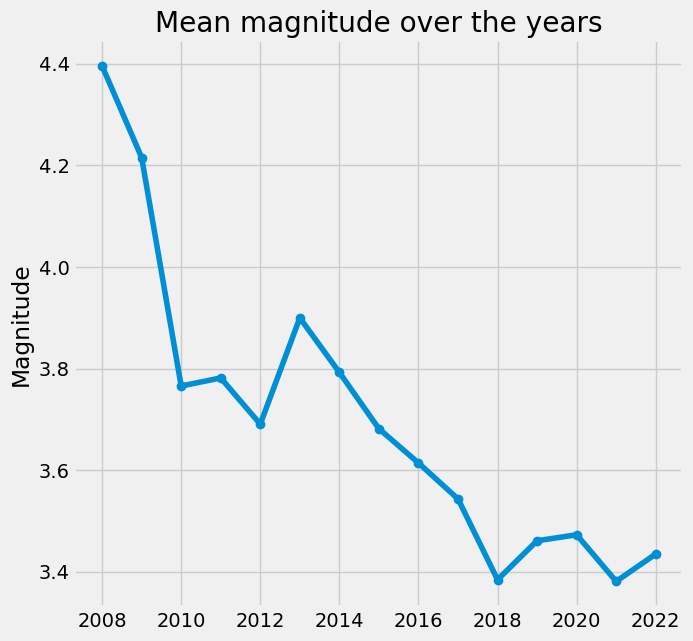

In [127]:
#How
fig, ax = plt.subplots(figsize=(7,7))
gb = df.groupby('year')['magnitude'].mean().reset_index()
ax.plot(gb.year,gb.magnitude,marker = "o",)
ax.set_title('Mean magnitude over the years')
ax.set_ylabel("Magnitude");


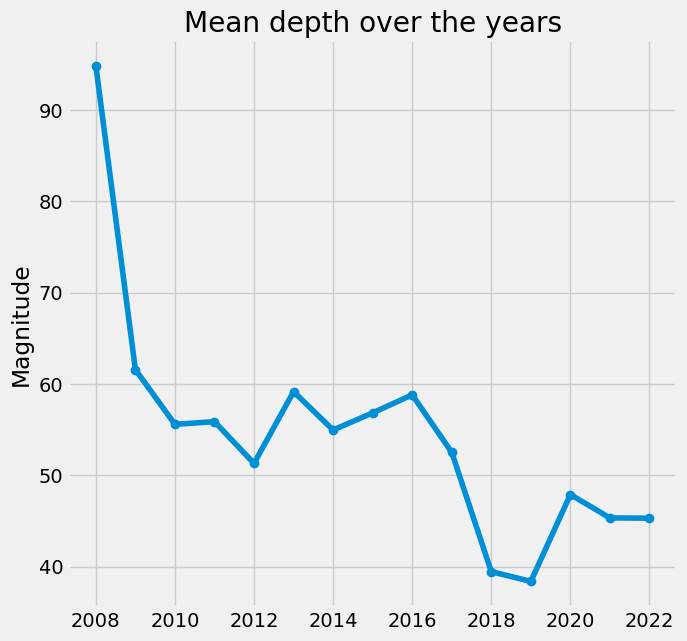

In [128]:
#How does the depth change over the years?
fig, ax = plt.subplots(figsize=(7,7))
gb_depth = df.groupby('year')['depth'].mean().reset_index()
ax.plot(gb_depth.year,gb_depth.depth, marker='o',)
ax.set_title('Mean depth over the years')
ax.set_ylabel("Magnitude");

In [129]:

data = df.copy()
data = data.drop(columns  = ['date_time'])
data

,date,time,latitude,longitude,depth,magnitude,year
date_time,,,,,,,
2008-11-01 00:31:25,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99,2008
2008-11-01 01:34:29,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51,2008
2008-11-01 01:38:14,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54,2008
2008-11-01 02:20:05,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42,2008
2008-11-01 02:32:18,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41,2008
...,...,...,...,...,...,...,...
2022-09-26 22:00:50,2022-09-26,22:00:50,-8.15,121.35150,10.0,3.41,2022
2022-09-26 22:08:59,2022-09-26,22:08:59,0.97,125.63014,12.1,3.29,2022
2022-09-26 22:11:43,2022-09-26,22:11:43,-8.27,116.71154,10.0,3.38,2022


### Date-time features

For the date time features, I decided to process it into time-stamps object and use it as a feature for the model. 

In [130]:
import datetime
import time

timestamp = []
for d, t in zip(data['date'], data['time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%Y-%m-%d %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
       
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)

data['timestamp'] = timeStamp.values
final_data = data.drop(columns = ['date', 'time', ])
final_data = final_data[final_data.timestamp != 'ValueError']
final_data.head()

,latitude,longitude,depth,magnitude,year,timestamp
date_time,,,,,,
2008-11-01 00:31:25,-0.60,98.89553,20.0,2.99,2008,1.225471e+09
2008-11-01 01:34:29,-6.61,129.38722,30.1,5.51,2008,1.225474e+09
2008-11-01 01:38:14,-3.65,127.99068,5.0,3.54,2008,1.225475e+09
2008-11-01 02:20:05,-4.20,128.09700,5.0,2.42,2008,1.225477e+09
2008-11-01 02:32:18,-4.09,128.20047,10.0,2.41,2008,1.225478e+09


Choosing a splitting year. For now I am going to use the year 2022 as the validation set for seeing the model performance of the initial model and the final model.

In [131]:
splitting_year = 2021
features = ['latitude', 'longitude', 'timestamp']
target = ['magnitude']

train_splitted = final_data[final_data.year <= splitting_year].copy()
val_splitted = final_data[final_data.year > splitting_year].copy()


In [132]:
# Train-test split by year

X_train = train_splitted[features]
y_train = train_splitted[target]


X_val = val_splitted[features]
y_val = val_splitted[target]


In [133]:
#Using XGBoost for our model.
import xgboost as xgb
from sklearn import metrics
xgb.set_config(verbosity =0)

xg_reg = xgb.XGBRegressor(random_state =42)
xg_reg.fit(X_train,y_train)
y_pred_xg = xg_reg.predict(X_val)
print(metrics.mean_squared_error(y_pred_xg,y_val))

0.42037556335451004


The metric `WMAPE` (or in this special case, since every target has uniform weight; `WAPE`) is often used for time series models. This is the metric that I will use for tuning the model.

In [134]:
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

 
wmape_xg = wmape(y_val['magnitude'].values.reshape(-1,1), y_pred_xg    \
                .reshape(-1,1))

#How did our initial model perform?
print(f'XGBoost WMAPE: {wmape_xg}')


XGBoost WMAPE: 0.1463468828952275


### Optuna

`Optuna` is a well-known library for Bayesian optimization. The idea behind it is that it tries to spend more time on hyperparameter values that maximizes the intended metric. `WMAPE` is going to be the metric that I am asking `Optuna` to minimize (Since a lower `WMAPE` mean a more accurate estimate).

To use Optuna, there is an objective function that is needed to specify. This tells `Optuna` what to minimize. Afterwards, trials are done 25 times. The hold-out validation set are made using `TimeSeriesSplit` from `scikit-learn`. 

In [135]:
from sklearn import model_selection
import optuna


def objective(trial, df = train_splitted, x = X_train, y= y_train):
    
    tss = model_selection.TimeSeriesSplit(n_splits = 6, test_size  = 1000, gap =1)

    param ={

        "random_state" : 42,
        "silent": 1,
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1,10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02,0.1,0.14,0.3]),


    }

    wmapes= []
    #instansiate LGBMRegressor, hiding the warnings
    model = xgb.XGBRegressor(**param)

    for train_idx, val_idx in tss.split(df):
        x_train = x.iloc[train_idx]
        y_train = y.iloc[train_idx]

        x_test = x.iloc[val_idx]
        y_test = y.iloc[val_idx]

        model.fit(x_train, y_train, verbose=0)
        preds = model.predict(x_test)
        wmape_current = wmape(y_test['magnitude'].values.reshape(-1,1), preds.reshape(-1,1))
        wmapes.append(wmape_current)
    return np.mean(wmapes)



In [136]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-10-18 18:45:36,790] A new study created in memory with name: no-name-c19e82fe-c971-4ad1-a866-2737099bb7e1
[I 2022-10-18 18:45:46,452] Trial 0 finished with value: 0.1617218366346391 and parameters: {'n_estimators': 139, 'lambda': 0.02332457062002498, 'alpha': 0.0002102275798515841, 'max_depth': 3, 'min_child_weight': 16, 'subsample': 0.7, 'learning_rate': 0.3}. Best is trial 0 with value: 0.1617218366346391.
[I 2022-10-18 18:46:30,698] Trial 1 finished with value: 0.15254748013150018 and parameters: {'n_estimators': 329, 'lambda': 1.1775924816449201e-08, 'alpha': 0.00036827224949026775, 'max_depth': 8, 'min_child_weight': 95, 'subsample': 0.7, 'learning_rate': 0.016}. Best is trial 1 with value: 0.15254748013150018.
[I 2022-10-18 18:47:02,538] Trial 2 finished with value: 0.15506711572973375 and parameters: {'n_estimators': 325, 'lambda': 0.803036857293328, 'alpha': 0.00031681905536439084, 'max_depth': 5, 'min_child_weight': 54, 'subsample': 1.0, 'learning_rate': 0.14}. Best is

Number of finished trials: 15
Best trial: {'n_estimators': 486, 'lambda': 0.0001386148463601334, 'alpha': 0.08670107009796346, 'max_depth': 10, 'min_child_weight': 272, 'subsample': 0.4, 'learning_rate': 0.012}


In [137]:
#Copying the best params into a dictionary and fitting the model with it.
params = {'n_estimators': 486, 'lambda': 0.0001386148463601334, 
            'alpha': 0.08670107009796346, 'max_depth': 10, 'min_child_weight': 272, 
            'subsample': 0.4, 'learning_rate': 0.012}

final_model  = xgb.XGBRegressor(**params, silent = 1, random_state = 42)

final_model.fit(X_train,y_train)
y_pred_fm = final_model.predict(X_val)

#How's the RMSE?
print(metrics.mean_squared_error(y_pred_fm,y_val))

0.3816021725535638


In [138]:

#Hows the WMAPE?
wmape_xg = wmape(y_val['magnitude'].values.reshape(-1,1), y_pred_fm.reshape(-1,1))
print(f'XGboost WMAPE: {wmape_xg}')

XGboost WMAPE: 0.13829633893301713


It is shown that `Optuna` did manage to reduce the `WMAPE`. I do have to admit that the WMAPE is not very ideal, I would have wanted to see something less than 10%. But judging how the average magnitude of the earthquakes don't follow a predictable trend, I am quite satisfied with the performance of the model. What is left to do is to load the model into a pickle file.

In [139]:
import pickle 

pickle.dump(final_model, open('final_model.pkl', 'wb'))